# Setup
### Imports, wipe working directories, reload .py scripts

In [6]:
%reset -f

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import importlib, os

from lib import path_tools as pt
from lib import import_data

# Dropcasting Solvent Study 

# DMF

In [11]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "xrd"

In [13]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot
XRD_data = {}

# ETB-046 Variables
samples_dir = {
    "dmf": "200124 DMF Dropcast Samples/",
}

for run_ID in samples_dir.keys():
    XRD_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.


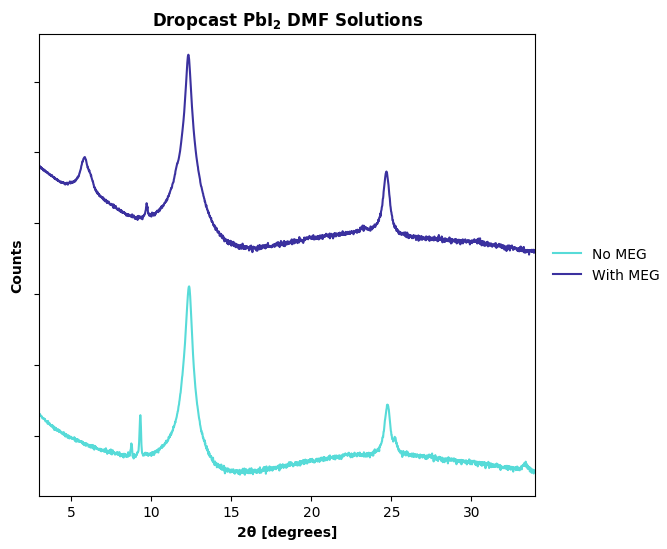

In [50]:
fig = plt.figure(1, figsize=[6.4, 6])
fig_ax = plt.gca()

offset = 0
lbl = None

master_cypher = (
#     "MAPbI DMF noMEG",
#     "MAPbI DMF wMEG",
    "PbI2 DMF noMEG",
    "PbI2 DMF wMEG",
)

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in XRD_data[run_ID].keys():
            samplemax = max(np.log10(XRD_data[run_ID][sample_ID]["counts"]))
            
            if "PbI2 DMF " in sample_ID:
                lbl = sample_ID.replace("PbI2 DMF ", "")
            elif "MAPbI DMF" in sample_ID:
                lbl = sample_ID.replace("MAPbI DMF ", "")
            
            if "noMEG" in lbl:
                lbl = lbl.replace("noMEG", "No MEG")
            elif "wMEG" in lbl:
                lbl = lbl.replace("wMEG", "With MEG")
                
            plt.figure(1)
            plt.plot(XRD_data[run_ID][sample_ID]["2theta"], np.log10(XRD_data[run_ID][sample_ID]["counts"]) + offset,
                     label=lbl)
            
            offset += samplemax
            lbl = None
            
plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(2, rot=4, hue=2, light=0.7, dark=0.25))

plt.xlabel("2θ [degrees]", weight="semibold")
plt.ylabel("Counts", weight="semibold")

plt.xlim(3,34)

fig_ax.set_yticklabels([])

plt.title("Dropcast PbI$_\mathbf{2}$ DMF Solutions",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.25,1),mode='expand', frameon=False)

In [51]:
fig.savefig("plots/final/XRD/dropcast_DMF_PbI2.png", dpi=200, format='png', bbox_inches='tight')

# DMSO

In [53]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "xrd"

In [55]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot
XRD_data = {}

# ETB-046 Variables
samples_dir = {
    "dmso": "191118 Dropcast Samples/DMSO/",
    "dmso2": "200121 DMSO Dropcast Samples/",
}

for run_ID in samples_dir.keys():
    XRD_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.
Creating new local data folder.


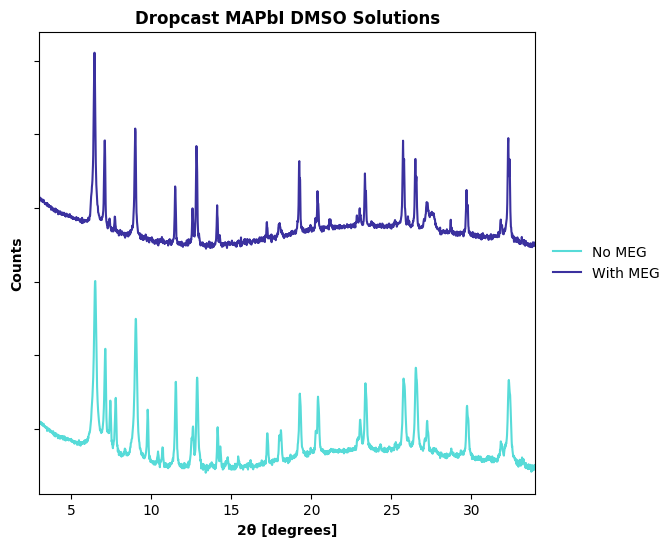

In [59]:
fig = plt.figure(1, figsize=[6.4, 6])
fig_ax = plt.gca()

offset = 0
lbl = None

master_cypher = (
#     "MAPLE PbI2 DMSO noMEG",
#     "MAPLE PbI2 DMSO wMEG",
    "MAPbI DMSO noMEG",
    "MAPbI DMSO wMEG",
)

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in XRD_data[run_ID].keys():
            samplemax = max(np.log10(XRD_data[run_ID][sample_ID]["counts"]))
            
            if "MAPLE PbI2 DMSO " in sample_ID:
                lbl = sample_ID.replace("MAPLE PbI2 DMSO ", "")
            elif "MAPbI DMSO" in sample_ID:
                lbl = sample_ID.replace("MAPbI DMSO ", "")
            
            if "noMEG" in lbl:
                lbl = lbl.replace("noMEG", "No MEG")
            elif "wMEG" in lbl:
                lbl = lbl.replace("wMEG", "With MEG")
                
            plt.figure(1)
            plt.plot(XRD_data[run_ID][sample_ID]["2theta"], np.log10(XRD_data[run_ID][sample_ID]["counts"]) + offset,
                     label=lbl)
            
            offset += samplemax
            lbl = None
            
plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(2, rot=4, hue=2, light=0.7, dark=0.25))

plt.xlabel("2θ [degrees]", weight="semibold")
plt.ylabel("Counts", weight="semibold")

plt.xlim(3,34)

fig_ax.set_yticklabels([])

#PbI$_\mathbf{2}$
plt.title("Dropcast MAPbI DMSO Solutions",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.25,1),mode='expand', frameon=False)

In [60]:
fig.savefig("plots/final/XRD/dropcast_DMSO_MAPbI.png", dpi=200, format='png', bbox_inches='tight')